# Task 4.9 Part 2

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

## Setting path

In [2]:
# Defining a path
path = r'/Users/hectorvargas/Desktop/Career_Foundry/11-2022 Instacart Basket Analysis'

## Importing customer dataframe

In [4]:
# Importing data
final_data = pd.read_pickle(os.path.join(path, '02 Data','Prepared Data', 'final_merged.pkl'))

In [5]:
# Checking "final_data Head"
final_data.head()

,order_id,user_id,eval_set,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,...,frequency_flag,first_name,last_name,gender,state,age,date_joined,no_of_dependents,fam_status,income
0,2539329,1,prior,1,2,8,NaN,196,1,0,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
1,2398795,1,prior,2,3,7,15.0,196,1,1,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
2,473747,1,prior,3,3,12,21.0,196,1,1,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
3,2254736,1,prior,4,4,7,29.0,196,1,1,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
4,431534,1,prior,5,4,15,28.0,196,1,1,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423


## 2. Creating a bar chart, a histogram, a scatterplot, and a line chart, using a sample subset for the line chart.

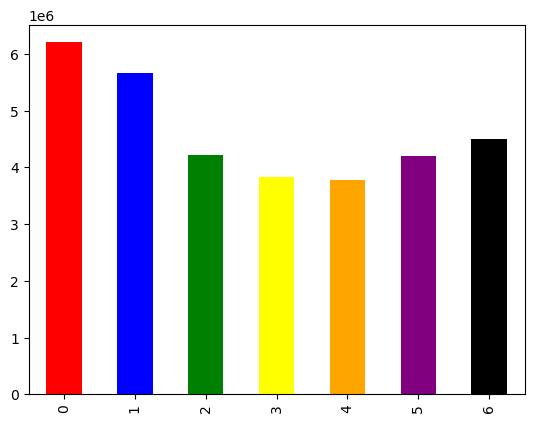

In [6]:
# Creating bar chart
bar = final_data['orders_day_of_week'].value_counts().sort_index().plot.bar(color = ['red', 'blue', 'green', 'yellow', 'orange', 'purple', 'black'])

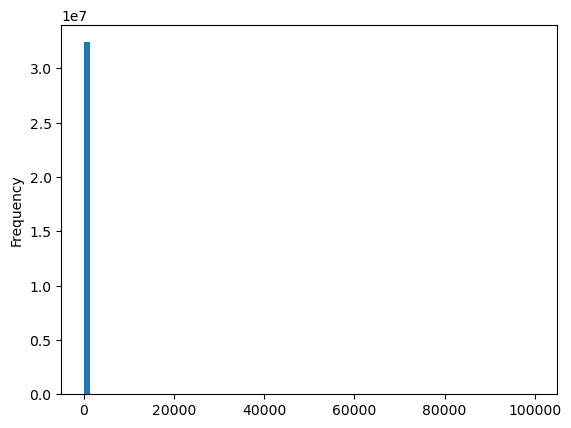

In [7]:
# Creating histogram
hist = final_data['prices'].plot.hist(bins=80)

In [8]:
# Checking MAX price
final_data['prices'].max()

99999.0

In [10]:
# turning Max prices into NaNs
final_data.loc[final_data['prices'] >100, 'prices'] = np.nan

In [11]:
final_data['prices'].max()

25.0

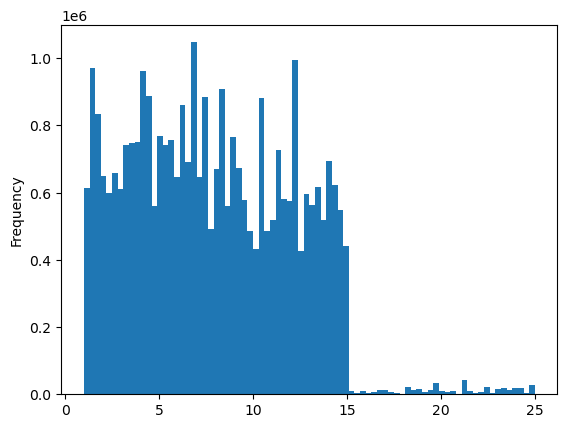

In [57]:
# # Histogram with 80 bins (Cleaned data)
hist2 = final_data['prices'].plot.hist(bins=80)

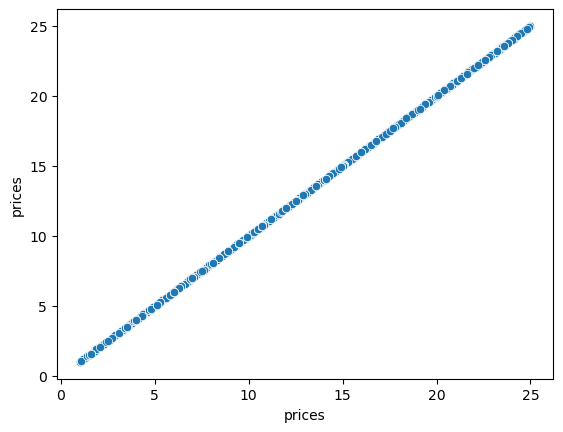

In [13]:
# Creating scatterplot with the 'price' variable
splot = sns.scatterplot(x = 'prices', y = 'prices', data = final_data)

## Using a sample subset for the line chart.

In [14]:
# Randomizing
np.random.seed(4)
dev = np.random.rand(len(final_data)) <= 0.7

In [15]:
dev

array([False,  True, False, ...,  True,  True,  True])

In [16]:
# np.random.rand() function produces a list of random numbers between 0 and 1
np.random.rand(5)

array([0.93546686, 0.06557465, 0.85698584, 0.24456371, 0.22683171])

In [18]:
# Storing 70% of the sample in the dataframe big
big = final_data[dev]

In [19]:
# Storing 30% of the sample in the dataframe small
small = final_data[~dev]

In [21]:
# Checking the LEN of the dataframe
len(final_data)

32404859

In [22]:
# Checking the LEN of the 2 samples
len(big) + len(small)

32404859

In [23]:
# Reducing the samples to “prices” and “orders_day_of_week.” Columns 
df_2 = small[['orders_day_of_week','prices']]

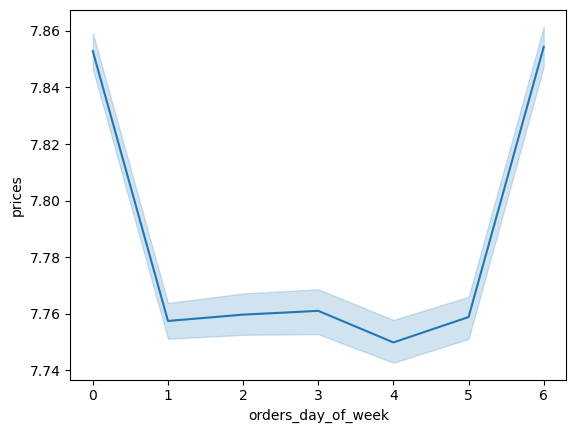

In [24]:
# Lineplot
line = sns.lineplot(data = df_2, x = 'orders_day_of_week',y = 'prices')

## 3. You need to provide the Instacart senior stakeholders with descriptive findings about sales. Create a histogram of the “order_hour_of_day” column.

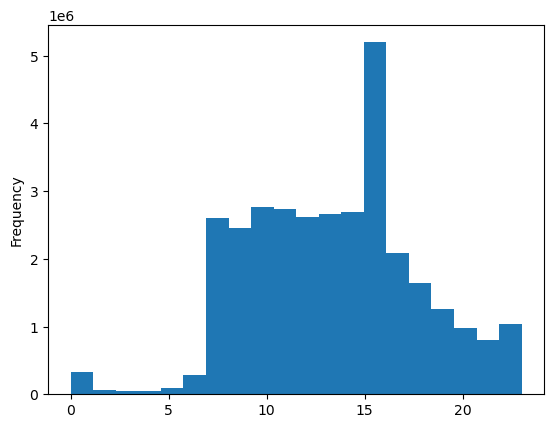

In [29]:
# Creating histogram of the “order_hour_of_day” 
hour_hist = final_data['order_hour_of_day'].plot.hist(bins = 20)

## 4. The marketing team is curious about the distribution of orders among customers in terms of loyalty. Create a bar chart from the “loyalty_flag” column.

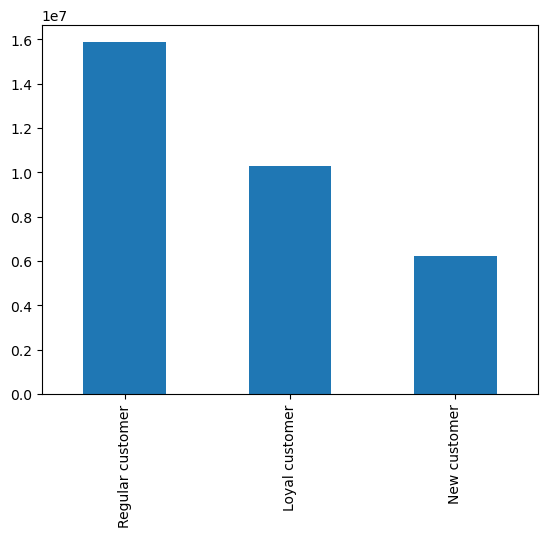

In [33]:
#Creating bar chart for the loyalty flag
loyalty_bar = final_data['loyalty_flag'].value_counts().plot.bar()

## 5. Check whether there’s a difference in expenditure (the “prices” column) depending on the hour of the day. (Hint: To check this, you need to use an accurate sample for your line chart!)

In [36]:
#Taking the previous splitted data of 70% _
hour_prices = big[['order_hour_of_day', 'prices']]

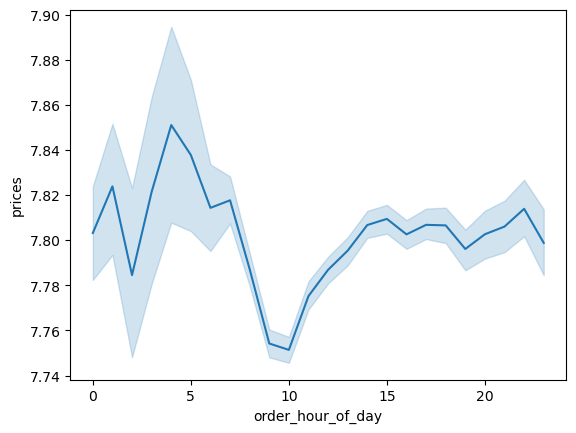

In [37]:
# Creating line chart
hour_prices_line = sns.lineplot(data = hour_prices, x = 'order_hour_of_day', y = 'prices')

## 6. Now that you have information about customers, you need to conduct some exploratory analysis of customer demographics to inform the targeted marketing campaigns. First, determine whether there’s a connection between age and family situation by creating a line chart exploring the connections between age and number of dependents:

In [40]:
#Taking the previous splitted data of 70% _
dependents = big[['no_of_dependents', 'age']]

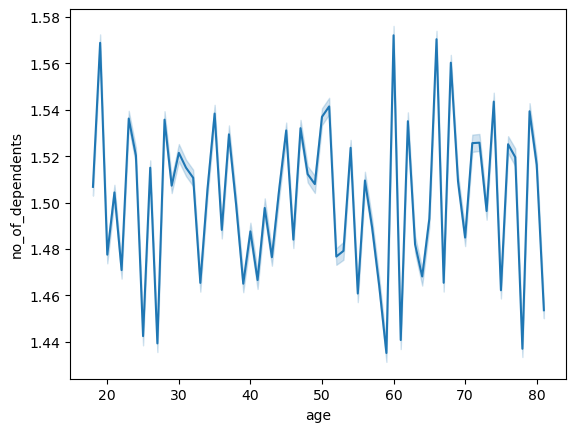

In [41]:
# Creating line chart
dependents_line = sns.lineplot(data = dependents, x = 'age', y = 'no_of_dependents')

#### The chart shows the connection between the number of members in a family and age. The chart does not offer any trend or relationship between the two variables. Perhaps if we look at the data at the state level, we might find exciting insights

## 7. You’ll also need to explore whether there’s a connection between age and spending power (income). To visualize this relationship, create a scatterplot using the sns.scatterplot() function.


In [42]:
#Taking the previous splitted data of 70% _
income = big[['income', 'age']]

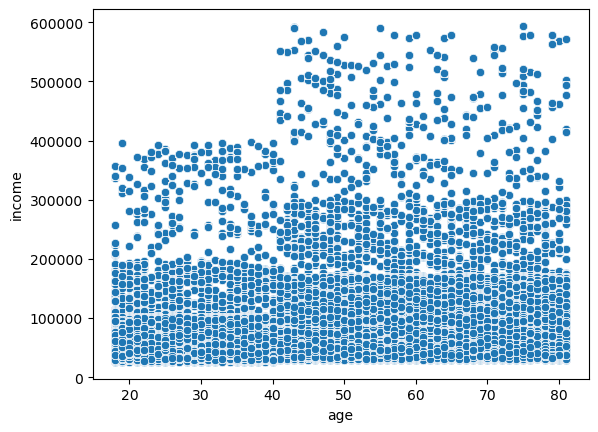

In [43]:
spending_power = sns.scatterplot(data = income, x = 'age', y = 'income', )

#### Based on the results, it can be said that most people earn between 20 and 200k a year. This concentration looks tighter from age 40, where the points are closer to each other. Instacar should launch campaigns with a target of people over 40 years of age, primarily targeting new customers who are the ones who spend the most in the e-shop based on previous analysis 

## 8. Export your visualizations as “.png” files in your relevant project folder.

In [44]:
bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_4_9.png'))

In [58]:
hist2.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'hist_4_9.png'))

In [46]:
splot.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'splot_4_9.png'))

In [47]:
line.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'line_4_9.png'))

In [60]:
hour_hist.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'hist_hour_4_9.png'))

In [50]:
loyalty_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'loyalty_bar_4_9.png'))

In [61]:
hour_prices_line.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'line_prices_hour_4_9.png'))

In [62]:
dependents_line.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'line_age_deps_4_9.png'))

In [56]:
spending_power.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'scatter_spending_power_4_9.png'))